<a href="https://colab.research.google.com/github/Karancse/Bank_Note_Authentication_using_MLDM/blob/main/Visualization_and_Analysis_for_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")

In [ ]:
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df=data

In [ ]:
"""
Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

"""

df.columns = ['VWT','SWT','CWT','E','C']
df

,VWT,SWT,CWT,E,C
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df.isnull().sum()

VWT    0
SWT    0
CWT    0
E      0
C      0
dtype: int64

In [ ]:
df.describe()

,VWT,SWT,CWT,E,C
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
print("Correlations:")
for i in df.columns[:-1]:
  print(i,":",df[i].corr(df['C']))

Correlations:
VWT : -0.724655202215046
SWT : -0.44428141314714703
CWT : 0.15534563101943397
E : -0.02320012830125491


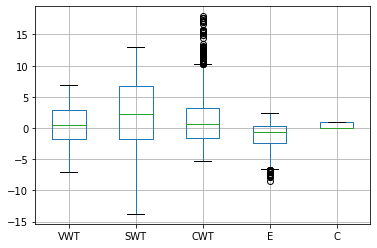

In [ ]:
boxplot = df.boxplot()

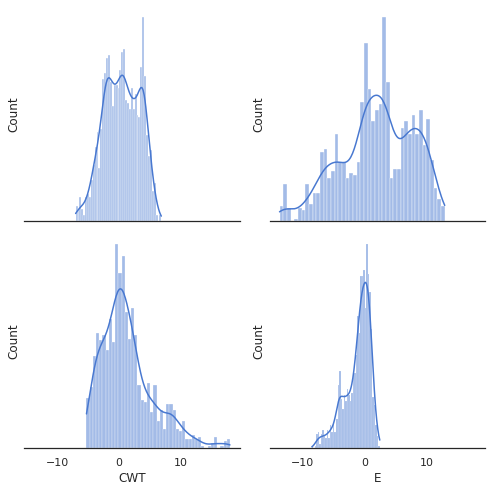

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)


sns.histplot(data=df, x="VWT", bins=45, kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="SWT", bins=45, kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="CWT", bins=45, kde=True, ax=axes[1, 0])
sns.histplot(data=df, x="E"  , bins=45, kde=True, ax=axes[1, 1])


plt.setp(axes, yticks=[])
plt.tight_layout()

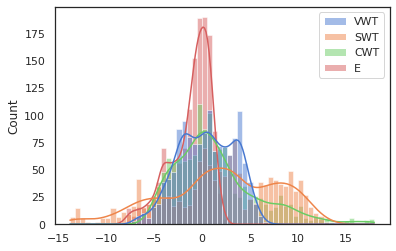

In [ ]:
sns.histplot(data=df.iloc[:,:-1], bins=60, kde=True)

In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = ['VWT','SWT','CWT','E','C']

print(normalized_df)

           VWT       SWT       CWT         E    C
0     0.835659  0.820982  0.121804  0.644326  0.0
1     0.786629  0.416648  0.310608  0.786951  0.0
2     0.757105  0.871699  0.054921  0.450440  0.0
3     0.531578  0.348662  0.424662  0.687362  0.0
4     0.822859  0.877275  0.057100  0.489711  0.0
...        ...       ...       ...       ...  ...
1366  0.537124  0.565855  0.165249  0.726398  1.0
1367  0.407690  0.332868  0.506753  0.808350  1.0
1368  0.237385  0.011768  0.985603  0.524755  1.0
1369  0.250842  0.201701  0.761587  0.660675  1.0
1370  0.324528  0.490747  0.343348  0.885949  1.0

[1371 rows x 5 columns]


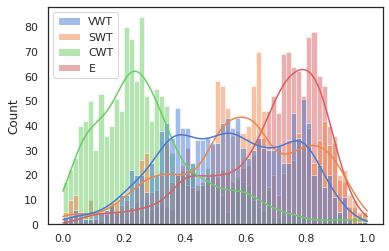

In [ ]:
sns.histplot(data=normalized_df.iloc[:,:-1], bins=60, kde=True)

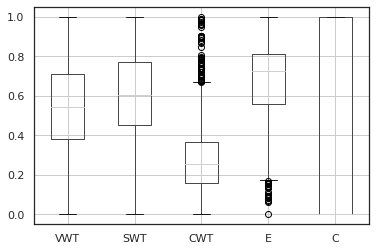

In [ ]:
boxplot = normalized_df.boxplot()

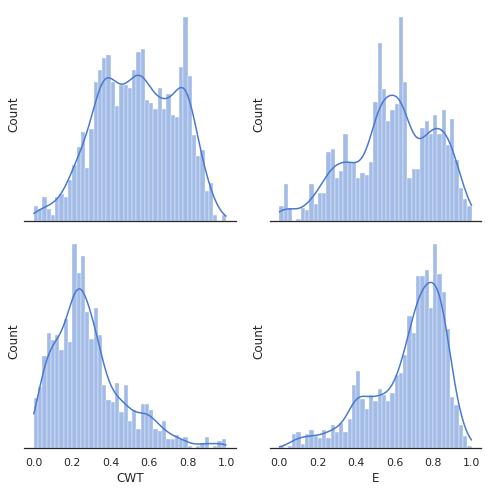

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)


sns.histplot(data=normalized_df, x="VWT", bins=45, kde=True, ax=axes[0, 0])
sns.histplot(data=normalized_df, x="SWT", bins=45, kde=True, ax=axes[0, 1])
sns.histplot(data=normalized_df, x="CWT", bins=45, kde=True, ax=axes[1, 0])
sns.histplot(data=normalized_df, x="E"  , bins=45, kde=True, ax=axes[1, 1])


plt.setp(axes, yticks=[])
plt.tight_layout()

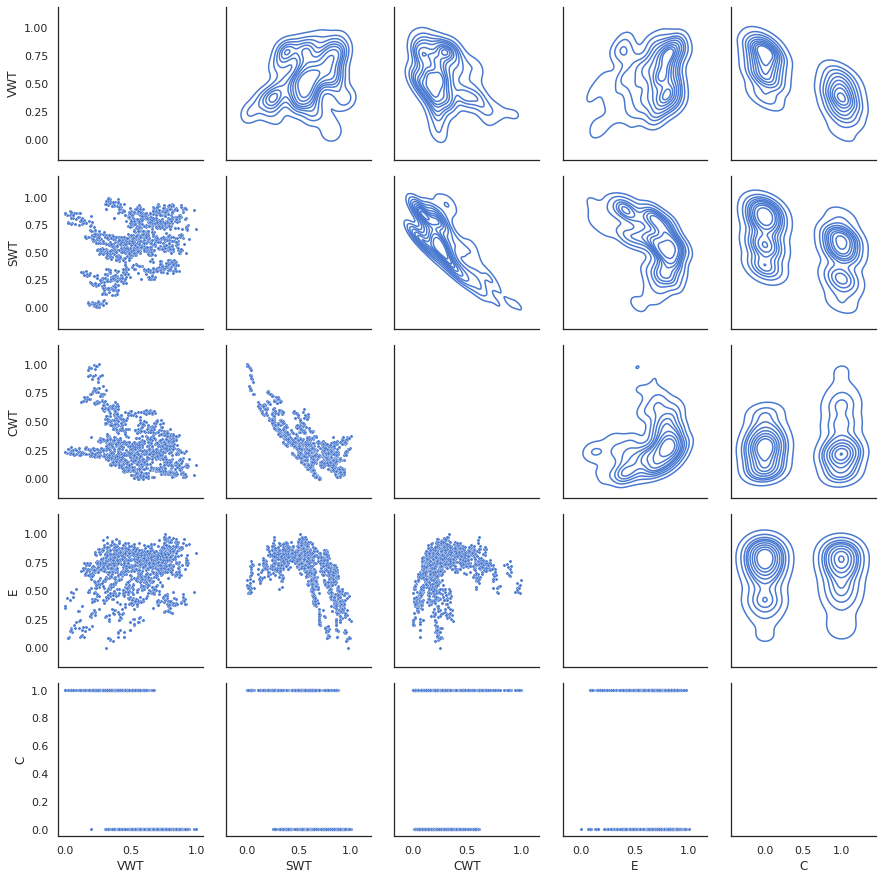

In [ ]:
g = sns.PairGrid(normalized_df)
#g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot, s=10)